In [ ]:
!pip install nbconvert

**Para começar a coletar os dados vamos realizar os seguintes cálculos:**

1.   Média do Tempo de Queda
2.   Desvio Padrão Amostral do Tempo
3.   Erro da Média do Tempo
4.   Erro Padrão do Tempo

**O erro da média é calculado pela seguinte relação:**

\begin{equation}
 \boxed{σ_{\overline{x}} = \frac{\sigma_{x}}{\sqrt{N}}} 
\end{equation}

**O erro da padrão é calculado pela seguinte relação:**

\begin{equation}
 \boxed{\sigma = \sqrt{\sigma_A^2 + \sigma_B^2}} 
\end{equation}

In [ ]:
import pandas as pd
import numpy as np

from numpy import mean
from numpy import std

tabela = pd.read_excel("/content/PlanilhaMec.xlsx") #aqui irá ler os dados em Excel
display(tabela) #vamos imprimir a tabela de um jeito mais bonito

print()

print('---------------- Calculos da Média ------------------------------')

print("Media do Comprimento(cm): ", str(round(mean(tabela['C']),2)))
print("Media do Largura(cm): ", str(round(mean(tabela['L']),2)))
print("Media da Área(cm²): ", str(round(mean(tabela['Área']),2)))

print()

print('---------------- Calculos do Desvio Padrão Amostral -----------------')

print("Desvio Padrão da Comprimento(cm): ", str(round(std(tabela['C']),2)))
print("Desvio Padrão da Largura(cm): ", str(round(std(tabela['L']),2)))
print("Desvio Padrão da Área(cm²): ", str(round(std(tabela['Área']),2)))

print()

print('---------------- Calculos Erro da Média -----------------')

Raiz_das_medidas = 5


Dp_Comprimento = np.std(tabela["C"])
Erro_Media_Comprimento = Dp_Comprimento / Raiz_das_medidas
print("Erro médio do Comprimento(cm): ", round(Erro_Media_Comprimento,2))

Dp_Largura = np.std(tabela["L"])
Erro_Media_Largura = Dp_Largura / Raiz_das_medidas
print("Erro médio da Largura(cm): ", round(Erro_Media_Largura,2))


Dp_Area = np.std(tabela["Área"])
Erro_Media_Área = Dp_Area / Raiz_das_medidas
print("Erro médio da Área (cm²): ",round(Erro_Media_Área,3))

print()

print('-------- Calculos Erro Padrão Largura e Comprimento --------')

Erro_do_instrumento = 0.1

Erro_total_comprimento = np.sqrt((Erro_do_instrumento)**2 + (Erro_Media_Comprimento)**2)
print("Erro Padrão Comprimento: ",round(Erro_total_comprimento,3))

Erro_total_largura = np.sqrt(((Erro_do_instrumento)**2 + (Erro_Media_Largura)**2))
print("Erro Padrão Largura: ", round(Erro_total_largura,3))


,Mesa,C,L,Área
0,1,149.0,75.0,11175.00
1,2,150.0,75.0,11250.00
2,3,147.0,75.0,11025.00
3,4,150.0,75.0,11250.00
4,5,149.0,75.0,11175.00
5,6,149.0,75.0,11175.00
6,7,149.5,75.0,11212.50
7,8,149.6,74.9,11205.04
8,9,149.7,74.8,11197.56
9,10,149.0,74.8,11145.20



---------------- Calculos da Média ------------------------------
Media do Comprimento(cm):  149.5
Media do Largura(cm):  74.94
Media da Área(cm²):  11203.22

---------------- Calculos do Desvio Padrão Amostral -----------------
Desvio Padrão da Comprimento(cm):  0.63
Desvio Padrão da Largura(cm):  0.12
Desvio Padrão da Área(cm²):  47.48

---------------- Calculos Erro da Média -----------------
Erro médio do Comprimento(cm):  0.13
Erro médio da Largura(cm):  0.02
Erro médio da Área (cm²):  9.496

-------- Calculos Erro Padrão Largura e Comprimento --------
Erro Padrão Comprimento:  0.161
Erro Padrão Largura:  0.103


# Histogramas que precisamos:

*   Histograma da Largura (cm)
*   Histograma do Comprimento (cm)
*   Histograma da Área (cm²)



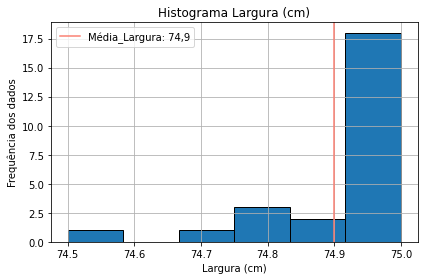

<Figure size 432x288 with 0 Axes>

In [ ]:

import matplotlib.pyplot as plt
tabela = pd.read_excel("/content/PlanilhaMec.xlsx") #aqui irá ler os dados em Excel

bin_count = int(np.ceil(np.log2(len(tabela['L']))) + 1)

# Criando o histograma para os dados da largura, com o int
plt.hist(tabela['L'], bins= bin_count, edgecolor="black")

# Colocando o título no histograma
plt.title("Histograma Largura (cm)")



#Podemos criar um legenda no gráfico para apontar a média
média = 74.9
cor = "#FA8072"
plt.axvline(média, color=cor, label="Média_Largura: 74,9")
plt.legend()

plt.grid()

# Colocando legenda nos Eixos
plt.xlabel("Largura (cm)")
plt.ylabel("Frequência dos dados")

plt.tight_layout()
#plotando o gráfico
plt.show()
plt.savefig('Largura.png')



Tempo máximo: 0.54
Tempo mínimo: 0.1


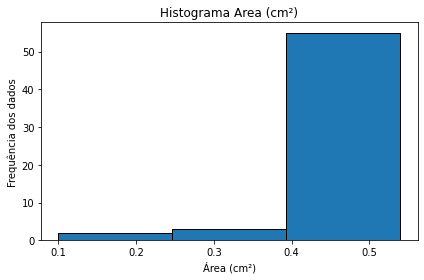

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

tabela = pd.read_excel("/content/Queda Livre.xlsx") #aqui irá ler os dados em Excel
# # Criando o histograma para os dados da Área


maximo_tempo = np.amax(tabela["Tempo"]) 
minimo_tempo = np.amin(tabela["Tempo"])
print("Tempo máximo:", maximo_tempo)
print("Tempo mínimo:", minimo_tempo)  

plt.hist(tabela['Tempo'],bins=3, edgecolor="black")

# Colocando o título no histograma
plt.title("Histograma Area (cm²)")

# #Podemos criar um legenda no gráfico para apontar a média
# média = 11203.23
# cor = "#FA8072"
# plt.axvline(média, color=cor, label="Média_Área: 11203.23")
# plt.legend()



# Colocando legenda nos Eixos
plt.xlabel("Área (cm²)")
plt.ylabel("Frequência dos dados")

plt.tight_layout()
 

plt.show()

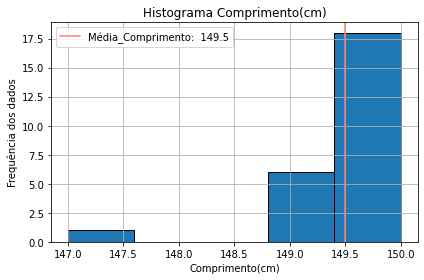

In [ ]:

import matplotlib.pyplot as plt

tabela = pd.read_excel("/content/PlanilhaMec.xlsx") #aqui irá ler os dados em Excel
# Criando o histograma para os dados da Área
plt.hist(tabela['C'],bins=5, edgecolor="black")

# Colocando o título no histograma
plt.title("Histograma Comprimento(cm)")

#Podemos criar um legenda no gráfico para apontar a média
média =  149.5
cor = "#FA8072"
plt.axvline(média, color=cor, label="Média_Comprimento:  149.5") 
plt.legend()

plt.grid()

# Colocando legenda nos Eixos
plt.xlabel("Comprimento(cm)")
plt.ylabel("Frequência dos dados")

plt.tight_layout()
 

plt.show()

# Calculando a correlação entre dos dados do comprimento e largura.

**Para isso iremos utilizar a covariancia entre x e y e coeficiente de Pearson (r). Depois iremos criar o gráfico de dispersão para visualizar como as grandezas de correlacionam graficamente.**

**Coeficiente de correlação linear de Pearson(r) que varia o intervalo entre -1 e 1.**


\begin{equation}
 \boxed{r = \frac{\sigma_{xy}}{\sigma_{x}\sigma_{y}}} 
\end{equation}

Pela só precisamos calcular a covariancia e dividir pelo produto dos desvios padraões


In [ ]:
import pandas as pd
import numpy as np


print("Calculando a covariancia entre comprimento e largura")
Covariancia = np.cov(tabela["C"], tabela["L"])[1][0]

print()

print("Covariancia entre Comprimento e Largura:", Covariancia)

print()

print("Calculando o Coeficiente de Pearson")

print()

r = Covariancia/(Dp_Comprimento*Dp_Largura)

print("Coeficiente de Pearson (r) =", r)


Calculando a covariancia entre comprimento e largura

Covariancia entre Comprimento e Largura: -0.01473333333333329

Calculando o Coeficiente de Pearson

Coeficiente de Pearson (r) = -0.19022130357241276


**Podemos ver que tanto a covariancia, quanto o coeficente de Pearson deram valores negativos, logo as grandezas de comprimento e largura não são correlacionadas entre si, na verdade são inversamente correlacionadas. 
Quando uma cresce, outra cai e vice-versa. Podemos avaliar isso pelo gráfica de dispersão abaixo.**

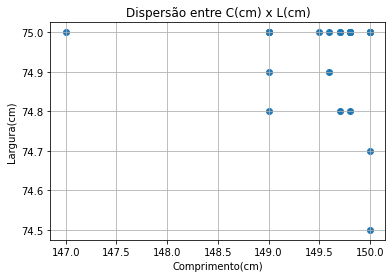

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

tabela = pd.read_excel("/content/PlanilhaMec.xlsx")#aqui irá ler os dados em Excel

plt.scatter(tabela["C"],tabela["L"],) #Aqui posso criar um gráfico de dispersão com os eixos x e y
plt.xlabel("Comprimento(cm)") #Colocando legendas no eixo x que é o comprimento neste caso
plt.ylabel("Largura(cm)") #Colocando legendas no eixo y que é a largura neste caso

plt.title("Dispersão entre C(cm) x L(cm)")

plt.grid()

plt.show()


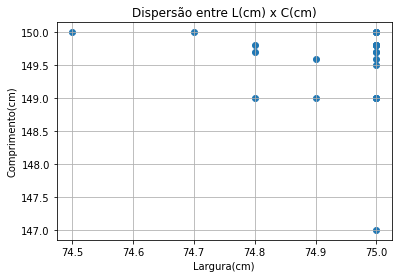

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

tabela = pd.read_excel("/content/PlanilhaMec.xlsx")#aqui irá ler os dados em Excel

plt.scatter(tabela["L"],tabela["C"],) #Aqui posso criar um gráfico de dispersão com os eixos x e y
plt.xlabel("Largura(cm)") #Colocando legendas no eixo x que é o comprimento neste caso
plt.ylabel("Comprimento(cm)") #Colocando legendas no eixo y que é a largura neste caso
plt.title("Dispersão entre L(cm) x C(cm)")
plt.grid()
plt.savefig("Dispersão2.png")

plt.show()

**Podemos ver também que os gráficos não apresentam correlação, o maior valor de uma grandeza é o menor de outra**

Agora criarei os gráficos da turma com as médias de comprimento, largura e área

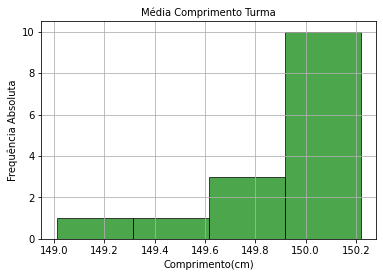

In [ ]:
import matplotlib.pyplot as plt

Media_Comp=[149.88,150.02,150.00,149.99,149.84,150.01,150.07,150.02,149.01,150.15,149.51,150.01,150.17,150.22,149.90]
plt.title('Média Comprimento Turma', fontsize=10)
plt.xlabel('Comprimento(cm)', fontsize=10)
plt.ylabel('Frequência Absoluta', fontsize=10)

# média =  149.98
# cor = "black"
# plt.axvline(média, color=cor, label="Média_Comprimento:  149.98") 
# plt.legend()

plt.tick_params(labelsize=10)
plt.grid()

plt.hist(Media_Comp, 4, color='green', alpha=0.7, edgecolor='black')
plt.savefig("Media_Alunos_Comp.jpg")
plt.show()




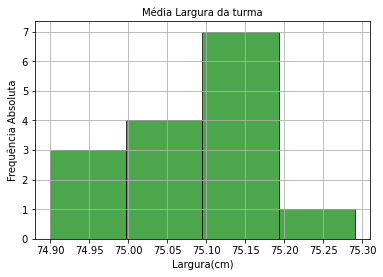

In [ ]:
import matplotlib.pyplot as plt

Media_Larg=[75.19,75.08,75.12,75.09,74.92,75.16,75.16,75.08,75.17,75.19,74.91,75.11,75.29,75.09,74.90]
plt.title('Média Largura Turma', fontsize=10)
plt.xlabel('Largura(cm)', fontsize=10)
plt.ylabel('Frequência Absoluta', fontsize=10)

# média =  75.10
# cor = "black"
# plt.axvline(média, color=cor, label="Média_Largura:  75.10") 
# plt.legend()

plt.tick_params(labelsize=10)
plt.grid()

plt.hist(Media_Larg, 4, color='green', alpha=0.7, edgecolor='black')
plt.savefig("Media_Alunos_Larg.jpg")
plt.show()




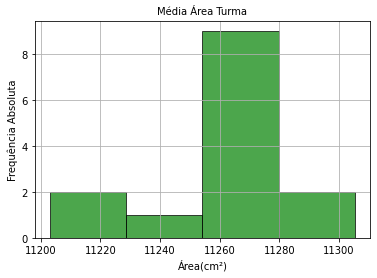

In [ ]:
import matplotlib.pyplot as plt

Media_Area=[11269.40,11264.40,11268.30,11263.79,11222.72,11278.52,11279.71,11264.40,11272.48,11290.83,11203.23,11267.70,11305.25,11230.81]
plt.title('Média Área Turma', fontsize=10)
plt.xlabel('Área(cm²)', fontsize=10)
plt.ylabel('Frequência Absoluta', fontsize=10)

# média =  11264.12
# cor = "black"
# plt.axvline(média, color=cor, label="Média_Area:11264.12") 
# plt.legend()

plt.tick_params(labelsize=10)
plt.grid()

plt.hist(Media_Area, 4,color='green', alpha=0.7, edgecolor='black')
plt.savefig("Media_Alunos_Area.jpg")
plt.show()






**Agora podemos calcular a incerteza da Área por meio da propagação de erros utilizando a relação abaixo:**

\begin{equation}
 \boxed{σ_{A} = A \sqrt{\left (\dfrac{σ_{c}}{c} \right)^2 + \left (\dfrac{ σ_{l}}{l} \right)^2}} 
\end{equation}

In [ ]:

import numpy as np 
# Derivada em g
Derivada_g = (2/(0.30)**2)
print("Derivada em G: ", Derivada_g)

# Derivada em t
Derivada_t = ((-2*0.90)/(0.30)**3)
print("Derivada em T: ", Derivada_t)


#Calculando a incerteza de g no analogico
erro_g = np.sqrt((Derivada_g * 0.0005)**2 + (Derivada_t * 0.0077)**2)
print("Erro de g analogico: ", erro_g)

Derivada em G:  22.22222222222222
Derivada em T:  -66.66666666666667
Erro de g analogico:  0.5134535693723773


**Calculando a incerteza de g no digital**

In [ ]:

import numpy as np 
# Derivada em g
Derivada_g = (2/(0.42)**2)
print("Derivada em G: ", Derivada_g)

# Derivada em t
Derivada_t = ((-2*0.90)/(0.42)**3)
print("Derivada em T: ", Derivada_t)

#Calculando a incerteza de g no analogico
erro_g = np.sqrt((Derivada_g * 0.0005)**2 + (Derivada_t * 0.00081)**2)
print("Erro de g digital: ", erro_g)

0.0006330749354005168
Derivada em G:  11.337868480725625
Derivada em T:  -24.29543245869777
Erro de g digital:  0.02047954285101034


**Calculando compatibilidade em Python**
 
 A compatibilidade  e discrepância é dada pela seguinte relação:

 \begin{equation}
    |\bar{x}-x_{ref}|< 2σ_{\bar{x}}
\end{equation}  

Sendo que se a discrepancia for menor que 2x a incerteza(σx) do valor de referência, aceita-se a compatibilidade.

Caso a discrepância caia na região entre 2x e 3x a incerteza(σx) o experimento é dado como **inconclusivo**.



In [1]:


import numpy as np

#Valor de referencia
g_ref = 9.79
#Valor da nossa gravidade 
G_digital = 10
#Incerteza da nossa gravidade
Incerteza_Gravidade = 0.020

#Erro2xSigmas
DoisSigma = round(2 * Incerteza_Gravidade,2)
print("2sigma:", DoisSigma)

#Erro3xSigmas
TresSigma = round(3 * Incerteza_Gravidade,2)
print("3sigma:", TresSigma)

# Calculando a discrepancia, vamos precisar calcular o módulo
discrepancia = np.abs(round(G_digital - g_ref,2)) #Utilizando a função abs para calcular o valor absoluto, ou o módulo
print("O valor da discrepancia é :", discrepancia)

#Agora vamos avaliar a compatibilidade
if(discrepancia < DoisSigma):
   print("É compativel com o valor de referencia", discrepancia, "<" , DoisSigma)
elif(DoisSigma > discrepancia < TresSigma):
   print("O valor está na região entre 2x e 3x a incerteza(sigma), logo inconclusivo:", discrepancia, ">", DoisSigma)
else:
  print("O valor é superior que 3x a incerteza(sigma), logo imcompativel :", discrepancia, ">",  TresSigma)


9.79
2sigma: 0.04
3sigma: 0.06
O valor da discrepancia é : 0.21
O valor é superior que 3x a incerteza(sigma), logo imcompativel : 0.21 > 0.06


**Compatibilidade meu Comprimento com comprimento de referência 150.00**

In [ ]:

!jupyter nbconvert --to html CalculosMecanica.ipynb
